Epoch 1/3000
1/1 [==============================] - 2s 2s/step - loss: 33128.4141 - mae: 182.0023 - val_loss: 9566.4961 - val_mae: 97.7980
Epoch 2/3000
1/1 [==============================] - 0s 104ms/step - loss: 8567.6621 - mae: 92.5126 - val_loss: 25399.6582 - val_mae: 159.3652
Epoch 3/3000
1/1 [==============================] - 0s 127ms/step - loss: 23628.1484 - mae: 153.6812 - val_loss: 9392.0811 - val_mae: 96.8999
Epoch 4/3000
1/1 [==============================] - 0s 202ms/step - loss: 8515.1377 - mae: 92.2335 - val_loss: 2.7706 - val_mae: 1.5563
Epoch 5/3000
1/1 [==============================] - 0s 116ms/step - loss: 15.9867 - mae: 3.1410 - val_loss: 6085.4966 - val_mae: 77.9987
Epoch 6/3000
1/1 [==============================] - 0s 159ms/step - loss: 6625.3926 - mae: 81.3645 - val_loss: 10912.6523 - val_mae: 104.4561
Epoch 7/3000
1/1 [==============================] - 0s 132ms/step - loss: 11594.6230 - mae: 107.6558 - val_loss: 6591.8643 - val_mae: 81.1802
Epoch 8/3000
1/1 [==

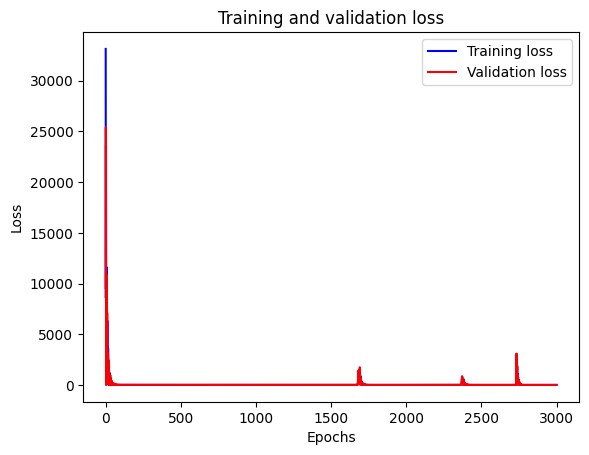

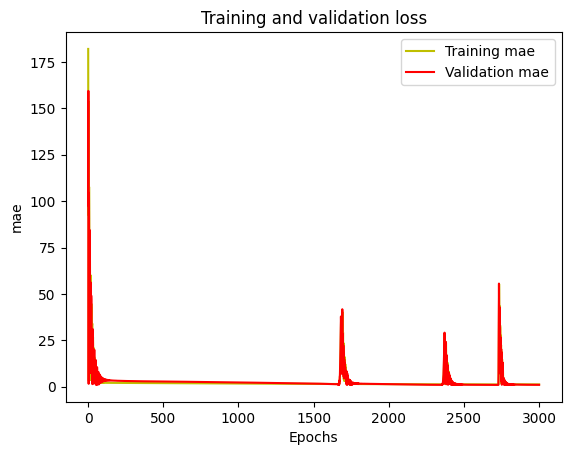

1/1 [==============================] - 0s 140ms/step
[[20.242994]
 [17.836763]
 [18.088707]
 [17.938267]
 [17.78779 ]
 [17.6372  ]
 [17.486502]
 [17.335783]
 [17.184925]]


In [5]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

#Cargar los datos en un data frame
data = pd.read_csv('/Users/User/Desktop/Proyecto-CF/proyecto/data/Consolidado/Datos-Proyeccion-Natalidad.csv')  # Reemplaza 'datos.csv' con el nombre de tu archivo de datos
data_test = pd.read_csv('/Users/User/Desktop/Proyecto-CF/proyecto/data/Consolidado/Datos-Proyeccion-Natalidad-test.csv')  # Reemplaza 'datos.csv' con el nombre de tu archivo de datos

# Dividir los datos en características (X) y etiquetas (y)
X = data.iloc[:, 0:4]  # Primeras cuatro columnas como características
y = data.iloc[:, 4:]    # Última columna como etiqueta


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#Crear el modelo de red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, input_dim=4, activation= 'relu'),
    tf.keras.layers.Dense(300, activation= 'relu'),
    tf.keras.layers.Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
#norm_layer.adapt(X_train)

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=3000, batch_size=32, validation_data=(X_test, y_test))

loss_eval = model.evaluate(X_test, y_test)
print('Pérdida en los datos de prueba: ', loss_eval)
#Graficar el historial de entrenamiento
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, mae, 'y', label='Training mae')
plt.plot(epochs, val_mae, 'r', label='Validation mae')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

# Realizar predicciones en nuevos datos
predictions = model.predict(data_test)

# Imprimir las predicciones
print(predictions)

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import optuna
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Cargar los datos en un data frame
data = pd.read_csv('/Users/User/Desktop/Proyecto-CF/proyecto/data/Consolidado/Datos-Proyeccion-Natalidad.csv')  

# Dividir los datos en características (X) y etiquetas (y)
X = data.iloc[:, 0:4]  # Primeras cuatro columnas como características
y = data.iloc[:, 4:]    # Última columna como etiqueta


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


# Dividir los datos en conjuntos de entrenamiento y prueba
train_data = data.sample(frac=0.8, random_state=0)
test_data = data.drop(train_data.index)

# Obtener las características y las etiquetas de entrenamiento y prueba
train_features = X_train[['Año', 'FPI (Nominal)', 'Precio Brent', 'Mundo (Inflacion)']]
train_labels = y_train['Mundo (Natalidad)']
test_features = X_test[['Año', 'FPI (Nominal)', 'Precio Brent', 'Mundo (Inflacion)']]
test_labels = y_test['Mundo (Natalidad)']

def objective(trial):
    # Definir los hiperparámetros a optimizar
    #num_neurons = trial.suggest_int('n_neurons_layers', 32, 512)
    num_hidden_layers = trial.suggest_int('num_hidden_layers', 1, 6)
    num_epochs = trial.suggest_int('num_epochs', 1000, 5000)

    # Crear el modelo de red neuronal
    model = keras.Sequential()
    model.add(layers.Dense(300, activation='relu', input_dim=4))
    for _ in range(num_hidden_layers):
        model.add(layers.Dense(300, activation='relu'))
    model.add(layers.Dense(1))

    # Compilar el modelo
    model.compile(optimizer='adam', loss='mean_squared_error'
                  , metrics=['mae']
                 )

    # Entrenar el modelo
    history = model.fit(train_features, train_labels
                        , epochs=num_epochs
                        , validation_data=(X_test, y_test)                  
                        ,batch_size=32
                       , verbose=0
                       )

    # Evaluar el modelo en el conjunto de prueba
    loss,mae = model.evaluate(test_features, test_labels, verbose=0)

    return mae

# Crear el estudio de Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials = 100)

# Obtener los mejores hiperparámetros encontrados
best_params = study.best_params
best_loss = study.best_value

print("Mejores hiperparámetros encontrados:")
print(best_params)
print("Mejor MAE encontrada:", best_loss)

[I 2024-01-22 17:36:37,570] A new study created in memory with name: no-name-355c2d01-dd76-4862-b819-7778dee08a30
[I 2024-01-22 17:40:52,841] Trial 0 finished with value: 1.7038010358810425 and parameters: {'num_hidden_layers': 6, 'num_epochs': 3121}. Best is trial 0 with value: 1.7038010358810425.
[I 2024-01-22 17:45:07,852] Trial 1 finished with value: 0.8317801356315613 and parameters: {'num_hidden_layers': 3, 'num_epochs': 3430}. Best is trial 1 with value: 0.8317801356315613.
[I 2024-01-22 17:49:39,332] Trial 2 finished with value: 1.938305377960205 and parameters: {'num_hidden_layers': 5, 'num_epochs': 3277}. Best is trial 1 with value: 0.8317801356315613.
[I 2024-01-22 17:55:00,526] Trial 3 finished with value: 0.9129006862640381 and parameters: {'num_hidden_layers': 1, 'num_epochs': 4472}. Best is trial 1 with value: 0.8317801356315613.
[I 2024-01-22 17:59:03,215] Trial 4 finished with value: 2.01947283744812 and parameters: {'num_hidden_layers': 6, 'num_epochs': 3047}. Best is

Mejores hiperparámetros encontrados:
{'num_hidden_layers': 1, 'num_epochs': 4499}
Mejor MAE encontrada: 0.7078325748443604


In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import optuna
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Cargar los datos en un data frame
data = pd.read_csv('/Users/User/Desktop/Proyecto-CF/proyecto/data/Consolidado/Datos-Proyeccion-Natalidad.csv')  

# Dividir los datos en características (X) y etiquetas (y)
X = data.iloc[:, 0:4]  # Primeras cuatro columnas como características
y = data.iloc[:, 4:]    # Última columna como etiqueta


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


# Dividir los datos en conjuntos de entrenamiento y prueba
train_data = data.sample(frac=0.8, random_state=0)
test_data = data.drop(train_data.index)

# Obtener las características y las etiquetas de entrenamiento y prueba
train_features = X_train[['Año', 'FPI (Nominal)', 'Precio Brent', 'Mundo (Inflacion)']]
train_labels = y_train['Mundo (Natalidad)']
test_features = X_test[['Año', 'FPI (Nominal)', 'Precio Brent', 'Mundo (Inflacion)']]
test_labels = y_test['Mundo (Natalidad)']

def objective(trial):
    # Definir los hiperparámetros a optimizar
    #num_neurons = trial.suggest_int('n_neurons_layers', 32, 512)
    num_hidden_layers = trial.suggest_int('num_hidden_layers', 1, 6)
    num_epochs = trial.suggest_int('num_epochs', 1000, 5000)

    # Crear el modelo de red neuronal
    model = keras.Sequential()
    model.add(layers.Dense(300, activation='relu', input_dim=4))
    for _ in range(num_hidden_layers):
        model.add(layers.Dense(300, activation='relu'))
    model.add(layers.Dense(1))

    # Compilar el modelo
    model.compile(optimizer='adam', loss='mean_squared_error'
                  , metrics=['mae']
                 )

    # Entrenar el modelo
    history = model.fit(train_features, train_labels
                        , epochs=num_epochs
                        , validation_data=(X_test, y_test)                  
                        ,batch_size=32
                       , verbose=0
                       )

    # Evaluar el modelo en el conjunto de prueba
    loss,mae = model.evaluate(test_features, test_labels, verbose=0)

    return mae

# Crear el estudio de Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials = 250)

# Obtener los mejores hiperparámetros encontrados
best_params = study.best_params
best_loss = study.best_value

print("Mejores hiperparámetros encontrados:")
print(best_params)
print("Mejor MAE encontrada:", best_loss)

[I 2024-01-23 01:09:11,248] A new study created in memory with name: no-name-19156e14-c36c-45ec-bd72-f03852eaf151
[I 2024-01-23 01:11:24,798] Trial 0 finished with value: 2.003121852874756 and parameters: {'num_hidden_layers': 5, 'num_epochs': 1838}. Best is trial 0 with value: 2.003121852874756.
[I 2024-01-23 01:15:07,393] Trial 1 finished with value: 2.6674082279205322 and parameters: {'num_hidden_layers': 5, 'num_epochs': 3124}. Best is trial 0 with value: 2.003121852874756.
[I 2024-01-23 01:20:05,986] Trial 2 finished with value: 1.245800256729126 and parameters: {'num_hidden_layers': 4, 'num_epochs': 4254}. Best is trial 2 with value: 1.245800256729126.
[I 2024-01-23 01:22:31,219] Trial 3 finished with value: 1.477622389793396 and parameters: {'num_hidden_layers': 5, 'num_epochs': 1934}. Best is trial 2 with value: 1.245800256729126.
[I 2024-01-23 01:26:05,585] Trial 4 finished with value: 0.8437697291374207 and parameters: {'num_hidden_layers': 2, 'num_epochs': 3227}. Best is tri

Mejores hiperparámetros encontrados:
{'num_hidden_layers': 3, 'num_epochs': 4093}
Mejor MAE encontrada: 0.7075782418251038
